
# Project: Investigate Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.Along with that it also contains data for Fifa ratings of teams,players as well as betting data from different sources.
This dataset is quite extensive, and stored in a SQLite database.

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


<a id='wrangling'></a>
## Data Wrangling

As Data is in SQLite Database , we will first load the data into dataframes and then have a look at the shape and other attributes of the given data.

### General Properties

In [4]:
# Connect to the database and load all the tables on the python code

con = sqlite3.connect('C:\\Users\\ZAID\\Downloads\\P2\\SoccerDatabase.sqlite')

cursor = con.cursor()
print("Opened database successfully")


#loading all the tables in dataframes

country = pd.read_sql_query('SELECT * FROM Country', con)
league = pd.read_sql_query('SELECT * FROM League', con)
match = pd.read_sql_query('SELECT * FROM Match', con)
player = pd.read_sql_query('SELECT * FROM Player', con)
playerAttr = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
teamAttr = pd.read_sql_query('SELECT * FROM Team_Attributes', con)


Opened database successfully


In [4]:
#Viewing shape of country and checking for null and duplicated values
print (country.shape)
print(country.duplicated().sum())
print(country.isnull().sum())

country.head()







(11, 2)
0
id      0
name    0
dtype: int64


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
#Viewing shape of league and checking for null and duplicated values
print (league.shape)
print(league.duplicated().sum())
print(league.isnull().sum())
league.head()

(11, 3)
0
id            0
country_id    0
name          0
dtype: int64


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [6]:
#As the we wont be using Betting data in our analysis we drop those columns
match = match.iloc[:, :77]


#Viewing shape of country and checking for null and duplicated values

print (match.shape)
print (match.duplicated().sum())
print(match.isnull().sum())
match.head()



(25979, 77)
0
id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_X1      1821
home_player_X2      1821
home_player_X3      1832
home_player_X4      1832
home_player_X5      1832
home_player_X6      1832
home_player_X7      1832
home_player_X8      1832
home_player_X9      1832
home_player_X10     1832
home_player_X11     1832
away_player_X1      1832
away_player_X2      1832
away_player_X3      1832
away_player_X4      1832
away_player_X5      1832
away_player_X6      1832
away_player_X7      1832
away_player_X8      1832
                    ... 
away_player_Y4      1832
away_player_Y5      1832
away_player_Y6      1832
away_player_Y7      1832
away_player_Y8      1832
away_player_Y9      1833
away_player_Y10     1833
away_player_Y11     1839
home_player

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Viewing shape of player and checking for null and duplicated values

print (player.shape)
print(player.duplicated().sum())
print(player.isnull().sum())


player.head()

(11060, 7)
0
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [175]:
#Viewing shape of player attributes and checking for null and duplicated values

print (playerAttr.shape)
print(playerAttr.duplicated().sum())
print(playerAttr.isnull().sum())
playerAttr.head()


(183978, 42)
0
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
stand

In [15]:
#Viewing shape of team and checking for null and duplicated values

print (team.shape)
print(team.duplicated().sum())
print(team.isnull().sum())
team.head()

(299, 5)
0
id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [12]:
#Viewing shape of team attributes and checking for null and duplicated values

print (teamAttr.shape)
print(teamAttr.duplicated().sum())
print(teamAttr.isnull().sum())
teamAttr.head()

(1458, 25)
0
id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover



### Data Cleaning 

In [177]:
# Player Attribute Table seems to have a number of na values in Columns which are going to be needed by us (eg. Overall Rating)
# so we drop those rows contaning na values

playerAttr=playerAttr.dropna()

#Viewing shape of Player attributes and checking for null and duplicated values after we have cleaned the data.
print (playerAttr.shape)
print(playerAttr.duplicated().sum())
print(playerAttr.isnull().sum())

#It is also observed that team and team Attribute table has some null or na values , but those wont be affecting our analysis 
# as we won't be using those columns in our analysis.


(180354, 42)
0
id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : How has Manchester United's performance been over the years at Home and Away?

In [178]:

#First we find the team id of Manchester United

#We can find details for Manchester United in the team data frame

team[team['team_long_name'].str.contains('Manchester United')]



,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN


In [179]:
#From the above step we have found the team_api_id for Manchester United
#Now we store it in a variable to use it for further process.

team_api_id_MU=10260  

#Now that we have the team_api_id we fetch only data for Manchester United 

match_MU=pd.read_sql_query('SELECT * FROM Match where home_team_api_id =10260 OR away_team_api_id=10260',con)

#Data frame contains of additional columns containing Betting data which we won't be using in our analysis.
#Hence, we trim the data frame to only columns which we require.

match_MU = match_MU.iloc[:, :77]
match_MU.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,25518,24228,30929,29581.0,38807,40565.0,30360,33852,34574,37799
1,1739,1729,1729,2008/2009,10,2008-10-29 00:00:00,489132,10260,8654,2,...,36394,24751,23818,26348.0,30966,24747.0,33049,27665,33781,24773
2,1749,1729,1729,2008/2009,11,2008-11-01 00:00:00,489142,10260,8667,4,...,40132,26066,34275,23022.0,34437,23946.0,30595,39073,23352,26143
3,1759,1729,1729,2008/2009,12,2008-11-08 00:00:00,489152,9825,10260,2,...,30615,30620,30865,32569.0,30893,40961.0,34944,30802,30829,27430
4,1769,1729,1729,2008/2009,13,2008-11-15 00:00:00,489162,10260,10194,5,...,40574,40005,40695,35467.0,23333,24133.0,35636,25668,38755,23314


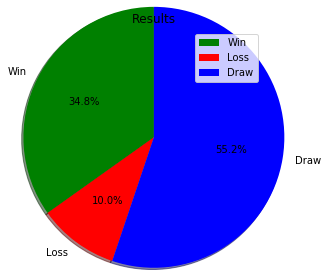

In [91]:
#declaring and initializing variables to store values of matches won ,lost or drawn.

home_win=0
draw=0
home_loss=0
away_win=0
away_loss=0
total_win=0
total_loss=0
total=0

# Go through the data and increase counts for corresponding values

for row in match_MU.itertuples():
# Checking condition and incrementing Draw
    if (row.away_team_api_id==team_api_id_MU or row.home_team_api_id==team_api_id_MU) and row.home_team_goal==row.home_team_goal:
        draw=draw+1
# Checking condition and incrementing Home win or loss as applicable
    if row.home_team_api_id==team_api_id_MU and row.home_team_goal>row.away_team_goal:
        home_win=home_win+1
    elif row.home_team_api_id==team_api_id_MU and row.home_team_goal<row.away_team_goal:
        home_loss=home_loss+1
        
# Checking condition and incrementing Away win or loss as applicable
    if row.away_team_api_id==team_api_id_MU and row.home_team_goal>row.away_team_goal:
        away_loss=away_loss+1
    elif row.away_team_api_id==team_api_id_MU and row.home_team_goal<row.away_team_goal:
        away_win=away_win+1

#adding up the totals

total_win=home_win+away_win
total_loss=home_loss+away_loss
total=draw+total_win+total_loss

#As the data we have found is of 3 variables , displaying it using a Pie chart would make it easier to look at the results
# showing percentages of wins,losses and draws.

#Legend for pie chart
results = ['Win', 'Loss', 'Draw'] 


slices = [total_win,total_loss,draw] 
  
# color for each label 
colors = ['g', 'r', 'b'] 
  
# plotting the pie chart using labels and slices which have defined above
plt.pie(slices, labels = results, colors=colors,  
        startangle=90, shadow = True, 
        radius = 1.5, autopct = '%1.1f%%')
#Giving the pie chart a title
plt.title('Results') 

plt.legend() 

#plotting the chart
plt.show()

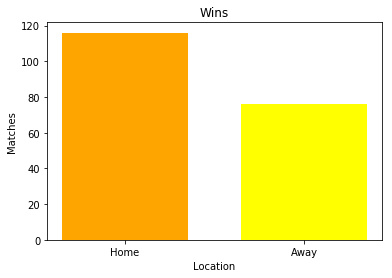

In [108]:
# Here we want to view the comparison between the home wins and away wins which we have found in the previous stage
#Hence, it would be appropriate to use a Bar Chart to show the comparison

left = [1, 2]
  
# heights of bars 
height = [home_win, away_win]
  
# labels for bars 
tick_label = ['Home','Away'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.7, color = ['orange', 'yellow']) 
  
# naming the x-axis 
plt.xlabel('Location') 
# naming the y-axis 
plt.ylabel('Matches') 
# plot title 
plt.title('Wins') 
  
# function to show the plot 
plt.show()  

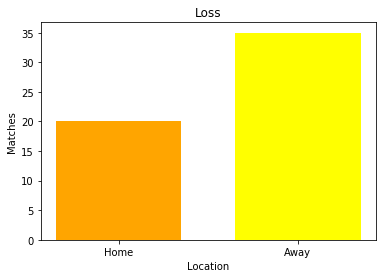

In [109]:
# Here we want to view the comparison between the home losses and away losses which we have found in the previous stage
#Hence, it would be appropriate to use a Bar Chart to show the comparison
left = [1, 2]
  
# heights of bars 
height = [home_loss, away_loss]
  
# labels for bars 
tick_label = ['Home','Away'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.7, color = ['orange', 'yellow']) 
  
# naming the x-axis 
plt.xlabel('Location') 
# naming the y-axis 
plt.ylabel('Matches') 
# plot title 
plt.title('Loss') 
  
# function to show the plot 
plt.show() 

### Research Question 2 : What has Cristiano Ronaldo's Fifa rating been over the years ? Has he been able to meet his potential ?

In [110]:
#First we find the player_fifa_api_id for Cristiano Ronaldo

#This data can be fetched from player data frame 

player[player['player_name'].str.match('Cristiano Ronaldo')]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1992,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176


In [152]:
#Now that we have found the player_fifa_api_id we will be using it further to 
#Fetch data for only Cristiano Ronaldo

player_attr_CR7=pd.read_sql_query('SELECT * FROM Player_Attributes where player_fifa_api_id=20801',con)

#Sorting the dataframe according to the date which will help in plotting the chart
player_attr_CR7=player_attr_CR7.sort_values('date')


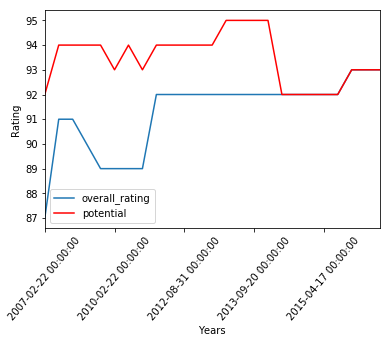

In [165]:
#As we will be comparing the potential vs rating over a number of years using a Line chart would be appropriate .

#Plotting a line chart comparing Ronaldo's rating and potential over the years
ax = plt.gca()
#Plotting the overall_rating first
player_attr_CR7.plot(kind='line',x='date',y='overall_rating',ax=ax)
#Plotting the potential rating in red 
player_attr_CR7.plot(kind='line',x='date',y='potential', color='red',ax=ax)
#As x ticks are very long and do not fit , we rotate it by  50 degrees
plt.xticks(rotation=50)
plt.xlabel('Years')
plt.ylabel('Rating')
plt.show()

<a id='conclusions'></a>
## Conclusions

#### Research Question 1 : How has Manchester United's performance been over the years at Home and Away?

Manchester United had a majority of it's matches with a result of 'Draw' followed by 'Wins' and then 'Loss'.

Manchester United has won more matches at Home as compared to Away.

Also, it has lost more matches at Away as compared to Home.

#### Research Question 2 : What has Cristiano Ronaldo's Fifa rating been over the years ? Has he been able to meet his potential ?

Cristiano Ronaldo's rating has increased from 87 to 93 in the given years.
His rating seems to have remained constant for the past 4 years.

Also, Cristiano Ronaldo's rating was lacking behind from his potential in the beginning but now he has reached his potential and has been in the same track with his potential for the past 2 years.

It can also be observed that his potential has dropped over the past 2 years , main reason behind this would be the age of the player .


#### Limitations: 

The database provided had a number of tables which has null or na rows.
This required more efforts as the data had to be cleanseds first before using .

The Match table has a lot of columsn with all missing data such as Goal,shoton,shotoff  etc which could have been used for analysis if they were provided accurately.